## EDA for News Article DataSet

In [21]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Load Data

In [22]:
file_name = '/Users/avichanales/Dropbox/Insight/Project/raw_data/news_data_all.csv'
all_news = pd.read_csv(file_name)

In [24]:
all_news.columns

Index(['index', 'id', 'title', 'author', 'date', 'content', 'year', 'month',
       'publication', 'category', 'digital', 'section', 'url'],
      dtype='object')

In [25]:
all_news.dtypes

index           object
id              object
title           object
author          object
date            object
content         object
year           float64
month          float64
publication     object
category        object
digital        float64
section         object
url             object
dtype: object

In [26]:
all_news.describe()

,year,month,digital
count,191530.000000,191530.000000,193115.000000
mean,2016.312374,5.723589,1.060435
std,0.833314,3.467818,1.200331
min,2000.000000,1.000000,0.000000
25%,2016.000000,3.000000,0.000000
50%,2016.000000,5.000000,1.000000
75%,2017.000000,9.000000,1.000000
max,2018.000000,12.000000,4.000000


In [27]:
all_news.head()

,index,id,title,author,date,content,year,month,publication,category,digital,section,url
0,0,1,Agent Cooper in Twin Peaks is the audience: on...,\nTasha Robinson\n,2017-05-31,And never more so than in Showtime’s new...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN
1,1,2,"AI, the humanity!",\nSam Byford\n,2017-05-30,AlphaGo’s victory isn’t a defeat for hum...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN
2,2,3,The Viral Machine,\nKaitlyn Tiffany\n,2017-05-25,Super Deluxe built a weird internet empi...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN
3,3,4,How Anker is beating Apple and Samsung at thei...,\nNick Statt\n,2017-05-22,Steven Yang quit his job at Google in th...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN
4,4,5,Tour Black Panther’s reimagined homeland with ...,\nKwame Opam\n,2017-05-15,Ahead of Black Panther’s 2018 theatrical...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN


In [28]:
article = all_news[all_news['title'] =='11 Killed in Synagogue Massacre; Suspect Charged With 29 Counts']
article

,index,id,title,author,date,content,year,month,publication,category,digital,section,url


In [29]:
all_news.isna().sum()

index               0
id                  0
title               5
author          54071
date            34274
content         37072
year            34274
month           34274
publication     29384
category        57091
digital         32689
section        151232
url            127008
dtype: int64

In [30]:
all_news = all_news[pd.notnull(all_news['content'])]

## Plot Distributions Over Variables

In [13]:
pub_count = all_news.groupby('publication')['id'].count().reset_index()
year_count = all_news.groupby('year')['id'].count().reset_index()
digital_count = all_news.groupby('digital')['id'].count().reset_index()
cat_count = all_news.groupby('category')['id'].count().reset_index()

### Publication

Text(0.5,1,'Distribution over Publications')

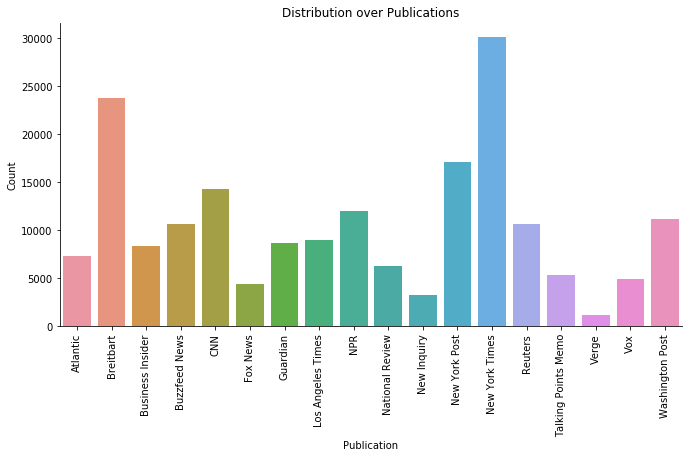

In [14]:
sns.catplot(x = 'publication', y = 'id', kind = 'bar', aspect = 2, data = pub_count)
plt.xticks(rotation=90)
plt.xlabel('Publication')
plt.ylabel('Count')
plt.title('Distribution over Publications')

### Year

Text(0.5,1,'Distribution over Years')

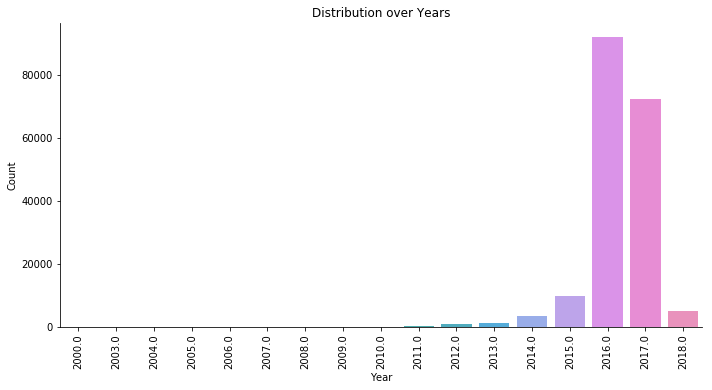

In [15]:
sns.catplot(x = 'year', y = 'id', kind = 'bar', aspect = 2, data = year_count)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution over Years')

### Category

Text(0.5,1,'Distribution over Category')

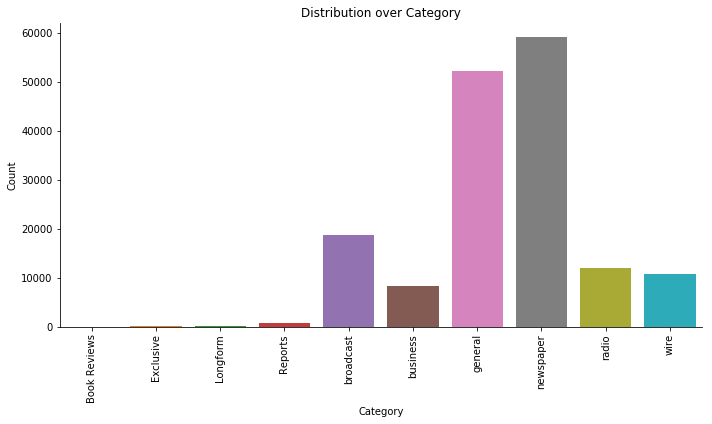

In [17]:
sns.catplot(x = 'category', y = 'id', kind = 'bar', aspect = 2, data = cat_count)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution over Category')

### Digital

In [18]:
### Not sure what this digital variable mean

Text(0.5,1,'Distribution over Digital')

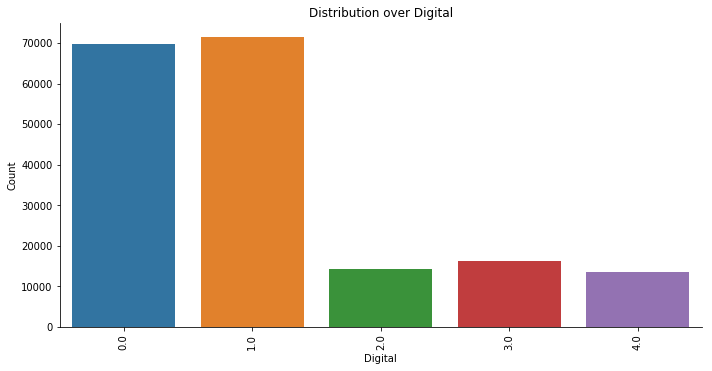

In [19]:
sns.catplot(x = 'digital', y = 'id', kind = 'bar', aspect = 2, data = digital_count)
plt.xticks(rotation=90)
plt.xlabel('Digital')
plt.ylabel('Count')
plt.title('Distribution over Digital')

### Article Length

In [31]:
#Create column that counts number of words in article
all_news['article_size'] = all_news.apply(lambda x: len(x['content'].split(" ")),axis=1)

In [37]:
all_news['article_size'].describe()

count    188732.000000
mean        834.510104
std         863.768557
min           1.000000
25%         368.000000
50%         672.000000
75%        1052.000000
max       50517.000000
Name: article_size, dtype: float64

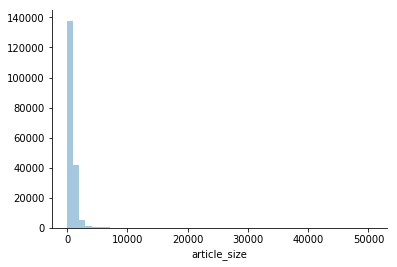

In [33]:
sns.distplot(all_news['article_size'],kde = False)
sns.despine()

In [34]:
all_news['article_size_log'] = np.log(all_news['article_size'])

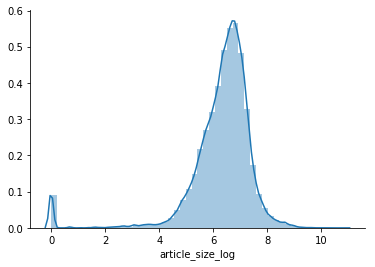

In [35]:
sns.distplot(all_news['article_size_log'])
sns.despine()

In [36]:
len(all_news[all_news['article_size']<100])/len(all_news)

0.04622957421105059

In [101]:
## only include articles with more than 100 words

#filter articles
articles_use = all_news[all_news['article_size']>100]

#save to csv
articles_use.to_csv('/Users/avi/Dropbox/Insight/Project/raw_data/news_data_clean.csv')